C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


input: [[ 0.659  0.991]
 [-1.485 -0.782]
 [-0.939  0.942]
 [ 1.341  1.2  ]
 [-1.222  1.494]
 [ 0.93   0.691]
 [ 0.295  0.707]
 [ 0.957 -0.799]
 [-0.499 -1.03 ]
 [-0.566  0.799]
 [-0.234 -0.795]
 [-1.389  0.877]
 [ 1.169 -1.141]
 [ 0.968 -0.641]
 [ 1.262  0.833]
 [-0.05  -0.786]
 [-0.467 -0.614]
 [ 1.184 -0.811]
 [ 0.543 -0.382]
 [ 1.478 -0.83 ]
 [ 1.091  0.895]
 [-1.081 -1.106]
 [-0.664  1.521]
 [-1.381 -0.878]
 [-0.262 -1.063]
 [-0.928 -0.7  ]
 [-1.143  1.34 ]
 [-1.169 -1.02 ]
 [-1.185  0.33 ]
 [ 0.527 -1.704]
 [ 0.475 -1.137]
 [-0.559  1.128]
 [-0.892  1.143]
 [-0.483 -0.809]
 [ 0.879 -1.229]
 [-1.099 -0.348]
 [-1.377 -0.695]
 [ 1.038  1.086]
 [ 0.992 -0.835]
 [ 0.835  0.808]
 [-0.536 -1.213]
 [ 1.226  0.919]
 [-0.635  1.342]
 [ 1.451 -1.646]
 [ 0.488 -0.242]
 [-0.588  0.73 ]
 [-0.934 -0.658]
 [ 1.095 -2.131]
 [-0.941  0.966]
 [-0.967 -1.408]
 [-0.721  1.06 ]
 [ 1.175  0.558]
 [ 0.688 -1.245]
 [ 0.278  1.506]
 [ 1.493 -0.512]
 [-0.642 -0.767]
 [-1.559 -0.738]
 [ 1.181 -0.885]
 [ 0.38

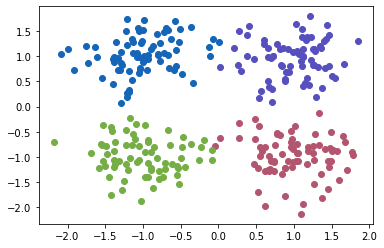

In [1]:
import numpy as np
import random

STOP_THRESHOLD = 1e-4
CLUSTER_THRESHOLD = 1e-1

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distance / bandwidth)) ** 2)

class MeanShift(object):
    def __init__(self, kernel=gaussian_kernel):
        self.kernel = kernel

    def fit(self, points, kernel_bandwidth):

        shift_points = np.array(points)
        shifting = [True] * points.shape[0]

        while True:
            max_dist = 0
            for i in range(0, len(shift_points)):
                if not shifting[i]:
                    continue
                p_shift_init = shift_points[i].copy()
                shift_points[i] = self._shift_point(shift_points[i], points, kernel_bandwidth)
                dist = distance(shift_points[i], p_shift_init)
                max_dist = max(max_dist, dist)
                shifting[i] = dist > STOP_THRESHOLD

            if(max_dist < STOP_THRESHOLD):
                break
        cluster_ids = self._cluster_points(shift_points.tolist())
        return shift_points, cluster_ids

    def _shift_point(self, point, points, kernel_bandwidth):
        shift_x = 0.0
        shift_y = 0.0
        scale = 0.0
        for p in points:
            dist = distance(point, p)
            weight = self.kernel(dist, kernel_bandwidth)
            shift_x += p[0] * weight
            shift_y += p[1] * weight
            scale += weight
        shift_x = shift_x / scale
        shift_y = shift_y / scale
        return [shift_x, shift_y]

    def _cluster_points(self, points):
        cluster_ids = []
        cluster_idx = 0
        cluster_centers = []

        for i, point in enumerate(points):
            if(len(cluster_ids) == 0):
                cluster_ids.append(cluster_idx)
                cluster_centers.append(point)
                cluster_idx += 1
            else:
                for center in cluster_centers:
                    dist = distance(point, center)
                    if(dist < CLUSTER_THRESHOLD):
                        cluster_ids.append(cluster_centers.index(center))
                if(len(cluster_ids) < i + 1):
                    cluster_ids.append(cluster_idx)
                    cluster_centers.append(point)
                    cluster_idx += 1
        return cluster_ids


from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt 

def colors(n):
  ret = []
  for i in range(n):
    ret.append((random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
  return ret

def main():
    centers = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
    X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.4)

    mean_shifter = MeanShift()
    _, mean_shift_result = mean_shifter.fit(X, kernel_bandwidth=0.5)

    np.set_printoptions(precision=3)
    print('input: {}'.format(X))
    print('assined clusters: {}'.format(mean_shift_result))
    color = colors(np.unique(mean_shift_result).size)

    for i in range(len(mean_shift_result)):
        plt.scatter(X[i, 0], X[i, 1], color = color[mean_shift_result[i]])
    plt.show()

if __name__ == '__main__':
    main()